In [1]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd

def get_data():
    r = urllib2.urlopen("https://github.com/msaricaumbc/DS_data/blob/master/ds602/people_wiki.zip?raw=true").read()
    file = ZipFile(BytesIO(r))
    people_wiki_csv = file.open("people_wiki.csv")
    people = pd.read_csv(people_wiki_csv)
    people.drop('URI', inplace=True, axis=1)
    return people

people = get_data()
people.head()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [2]:
people

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...
42781,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...
42782,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...
42783,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...
42784,Tatiana Faberg%C3%A9,tatiana faberg is an author and faberg scholar...


In [3]:
# Check for missing values
print(people.isnull().sum())

name    0
text    0
dtype: int64


In [4]:
people.dropna()

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...
42781,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...
42782,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...
42783,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...
42784,Tatiana Faberg%C3%A9,tatiana faberg is an author and faberg scholar...


In [5]:
# Check for duplicates
print('Number of duplicates:', people.duplicated().sum())
people.drop_duplicates(inplace=True)

Number of duplicates: 0


In [6]:
print('Number of duplicates:', people.duplicated().sum())

Number of duplicates: 0


In [7]:
people.describe()

,name,text
count,42786,42786
unique,42785,42786
top,author),digby morrell born 10 october 1979 is a former...
freq,2,1


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(people['text'])

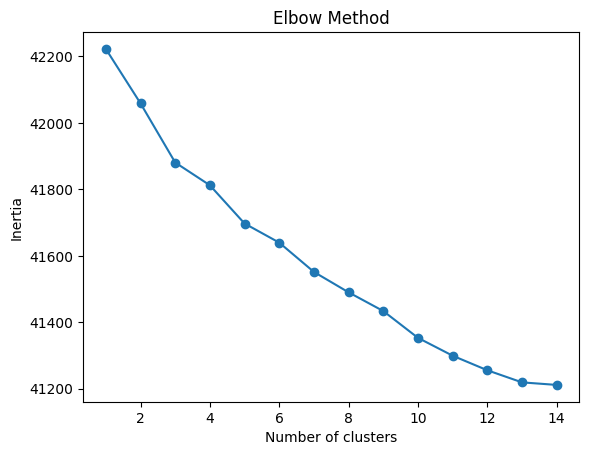

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto').fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english', max_features=10000)
corpus = vec.fit_transform(people.text)
corpus = corpus.toarray()

In [11]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
clusters = kmeans.fit_predict(X)

In [12]:
# Print the top words in each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print(f"Cluster {i}:")
    for j in order_centroids[i, :10]:
        print(f"  {terms[j]}")
    print()

Cluster 0:
  art
  new
  book
  work
  university
  published
  york
  born
  years
  books

Cluster 1:
  university
  research
  professor
  science
  institute
  law
  studies
  international
  phd
  society

Cluster 2:
  season
  football
  league
  played
  team
  coach
  club
  cup
  player
  games

Cluster 3:
  film
  theatre
  films
  television
  series
  award
  actor
  role
  directed
  festival

Cluster 4:
  music
  album
  band
  released
  orchestra
  jazz
  song
  records
  songs
  albums

Cluster 5:
  party
  election
  minister
  served
  member
  elected
  state
  district
  law
  president

Cluster 6:
  league
  baseball
  major
  season
  games
  runs
  pitcher
  played
  minor
  sox

Cluster 7:
  world
  championships
  won
  tour
  championship
  team
  olympics
  race
  racing
  finished

